## Introduction

The goal of this project is to analyze biodiversity data from the National Parks Service, focusing on the conservation statuses of various species observed in different national parks. This analysis aims to identify trends, patterns, and insights related to species endangerment and their distribution across parks.

Throughout the project, data will be scoped, cleaned, analyzed, and visualized to answer key questions about conservation efforts and species health.

The key questions this project seeks to address include:

- What is the distribution of conservation status for animals across different parks?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation statuses significant?
- Which species were spotted the most at each park?

Data Sources:
The datasets `Observations.csv` and `Species_info.csv` were provided by Codecademy.com.

Note: The data used in this project is inspired by real-world data but is mostly fictional.

## Import Python Modules
First step is importing the primary modules that will be used in this project:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the data
Loading the datasets `species_info.csv` and `observations.csv` is the first step in making the data accessible for analysis.


In [31]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
observations = pd.read_csv('observations.csv', encoding='utf-8')

## Data Exploration and Cleaning

Once the data is loaded, it’s essential to explore and clean it to ensure it’s in a usable format. This involves:

- **Inspecting the data** to understand its structure, including column names, data types, and overall size.
- **Checking for missing values**, duplicates, or irrelevant information, which can bias or mislead the analysis.
- **Handling missing data** appropriately by either removing or filling it with reasonable values, ensuring the dataset remains representative and reliable.


In [39]:
species.head()
species.info()
species.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


The `species_info.csv` contains information on the different species in the National Parks. There are **5,824** rows and **4** columns and the columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

It is apparent that `conservation_status` only has 191 entries (meaning 5633 missing values). In most cases `NaN` values must be treated carefully, but the absence of data here most likely means that these species are not under any conservation status. I will therefore replace all `NaN` values in that column with the label `No Special Status`.

In [42]:
species.fillna({'conservation_status': 'No Special Status'}, inplace=True)
species['conservation_status'].value_counts()


conservation_status
No Special Status     5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

In [38]:
observations.head()
observations.info()
observations.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


The `observations.csv` holds information from recorded sightings of different species at several national parks for the past 7 days. The columns in the data set include:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

## Analysis

This section will begin analyzing the data after initial exploration and is done to extract meaningful insights along with providing concrete answers to questions such as:
- **Distribution of Conservation Status:** Understanding how species are classified to identify trends in conservation and which categories require the most attention.
- **Endangerment Likelihood by Species Type:** Comparing conservation statuses across species types to determine if certain types (e.g., mammals, birds) are more prone to endangerment.
- **Statistical Testing:** Using statistical methods to help validate findings and ensures that any observed patterns are not due to random chance.
- **Most Commonly Spotted Species:** Reveals which species are most frequently observed, which may indicate their abundance or resilience within specific parks.

In [43]:
merged_df = pd.merge(species, observations, on='scientific_name')
merged_df.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Special Status,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Special Status,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Special Status,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Special Status,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Special Status,Yosemite National Park,128


Mrging the two data sets combines relevant information from `species` and `observarions` into one comprehensive table, which enables more meaningful analysis.

In [44]:
conservation_distribution = merged_df['conservation_status'].value_counts()
print(conservation_distribution)


conservation_status
No Special Status     24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: count, dtype: int64


Since I have merged the two datasets (`species`and `observations`), the `value_counts` function now includes both species and the additional context of where and how often those species were observed.

Before the merge, when I only had the species dataset, the `value_counts` was focused solely on the conservation statuses of species without considering their observations or parks.

                              park_name conservation_status  species_count
0                   Bryce National Park          Endangered             20
1                   Bryce National Park         In Recovery              6
2                   Bryce National Park   No Special Status           6188
3                   Bryce National Park  Species of Concern            183
4                   Bryce National Park          Threatened             11
5   Great Smoky Mountains National Park          Endangered             20
6   Great Smoky Mountains National Park         In Recovery              6
7   Great Smoky Mountains National Park   No Special Status           6188
8   Great Smoky Mountains National Park  Species of Concern            183
9   Great Smoky Mountains National Park          Threatened             11
10            Yellowstone National Park          Endangered             20
11            Yellowstone National Park         In Recovery              6
12            Yellowstone

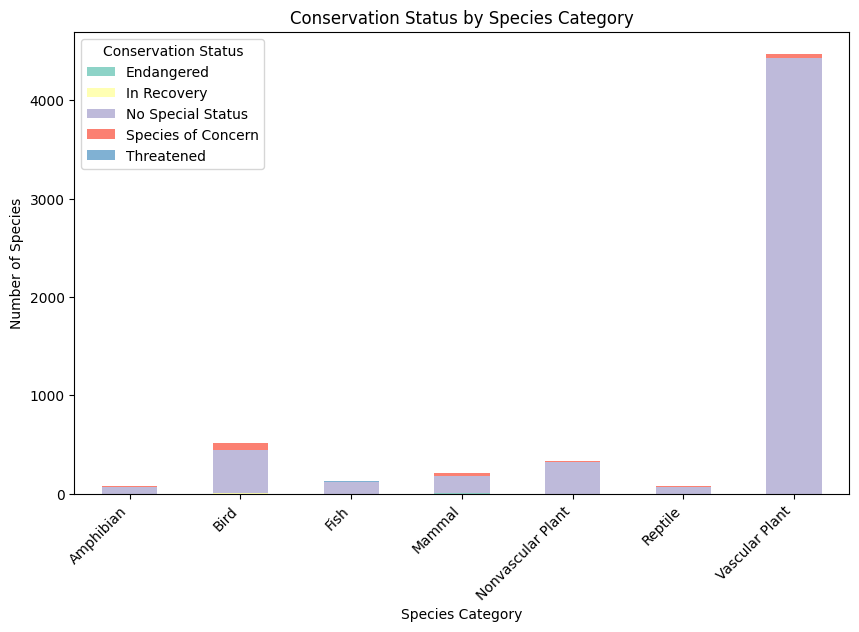

<Figure size 640x480 with 0 Axes>

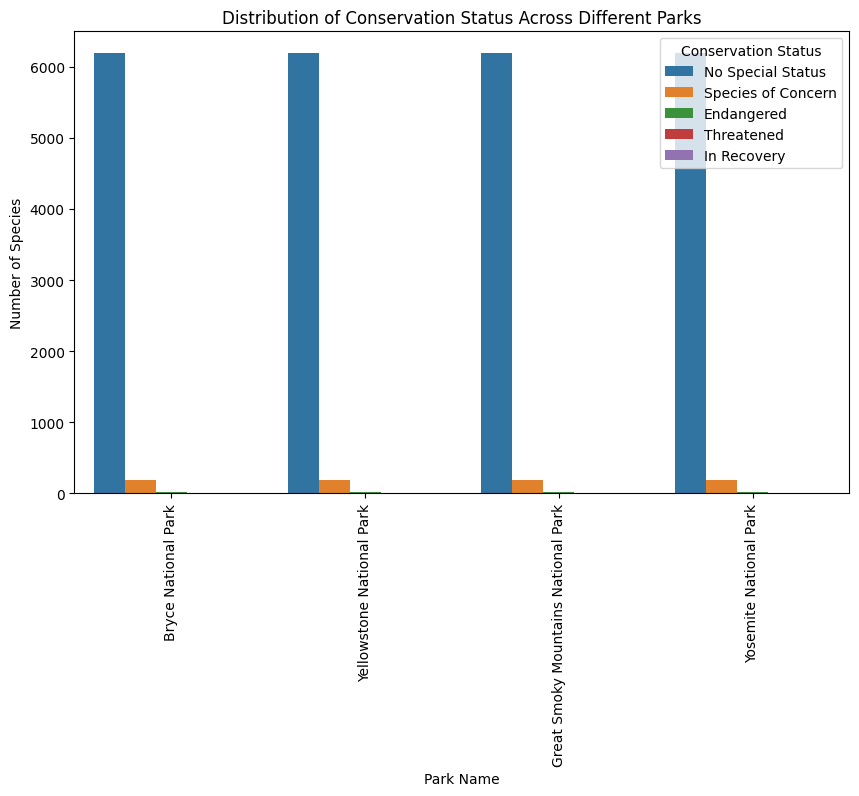

In [82]:
park_status_distribution = merged_df.groupby(['park_name', 'conservation_status']).size().reset_index(name='species_count')
print(park_status_distribution)

# Stacked bar plot for conservation status by category
category_status = pd.crosstab(species['category'], species['conservation_status'])
category_status.plot(kind='bar', stacked=True, figsize=(10,6), color=sns.color_palette('Set3'))
plt.title('Conservation Status by Species Category')
plt.xlabel('Species Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Conservation Status')
plt.show()
plt.clf()

# Plotting conservation status by park
plt.figure(figsize=(10,6))
sns.countplot(x='park_name', hue='conservation_status', data=merged_df)
plt.title('Distribution of Conservation Status Across Different Parks')
plt.xlabel('Park Name')
plt.ylabel('Number of Species')
plt.xticks(rotation=90)
plt.legend(title='Conservation Status')
plt.show()



